# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


## Visualize Dataset
This is the same code from Assignment 1

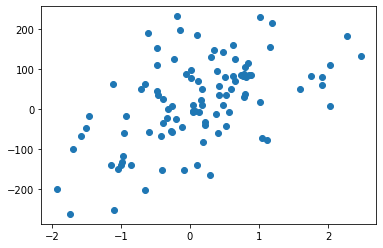

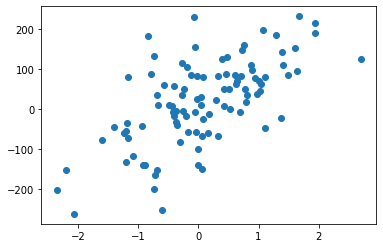

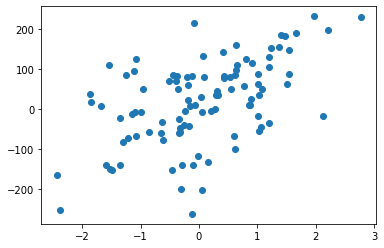

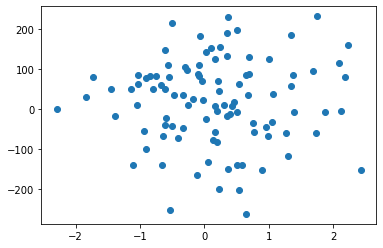

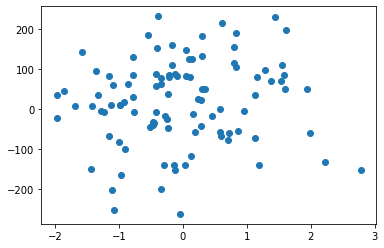

In [2]:
import matplotlib.pyplot as plt
for i in range(0,5):
   plt.scatter(X[:,i],y)
   plt.show()

# Your code here

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

normalizer = tf.keras.layers.Normalization(axis=-1)

model = tf.keras.Sequential([
        normalizer,
        layers.Dense(5, activation="relu"),
        layers.Dense(5, activation="relu"),
        layers.Dense(1),
    ])
model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.0001,momentum=0.0,nesterov=False),
    loss=tf.keras.losses.MeanSquaredError())
# Your code here

In [5]:
model.predict(X_train[:10])

array([[0.96831834],
       [0.44224247],
       [0.38219407],
       [0.3588397 ],
       [0.66568816],
       [0.09688072],
       [0.05039748],
       [0.35984945],
       [0.18092285],
       [0.72549266]], dtype=float32)

In [6]:
model.layers[1].kernel

<tf.Variable 'dense_3/kernel:0' shape=(5, 5) dtype=float32, numpy=
array([[ 0.1391111 , -0.1672982 , -0.05738139, -0.0669204 , -0.6406161 ],
       [-0.50629187,  0.58884025,  0.4811344 ,  0.6076734 , -0.5154078 ],
       [-0.44139558, -0.14560401,  0.15361464, -0.01053494, -0.21052486],
       [-0.22313714, -0.3654439 , -0.478134  , -0.05014104, -0.0857932 ],
       [ 0.13578337,  0.48350573,  0.14867705, -0.01209825,  0.06959748]],
      dtype=float32)>

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 5)                11        
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 77
Trainable params: 66
Non-trainable params: 11
_________________________________________________________________


In [8]:
%%time
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=1000)

CPU times: user 24.2 s, sys: 1.06 s, total: 25.2 s
Wall time: 24.5 s


## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

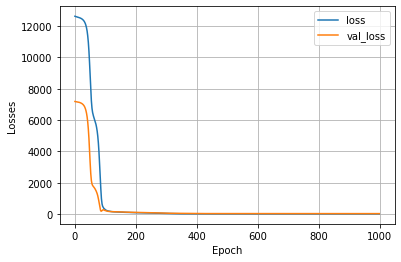

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
##plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend()
plt.grid(True)
# Your code here

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [10]:
predictions = model.predict(X_test)
# Insert the function for R2 Score

In [11]:
from sklearn.metrics import r2_score

print(r2_score(y_test,predictions))

0.9969116919921301


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

Your text here

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=10000, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)



In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

normalizer = tf.keras.layers.Normalization(axis=-1)

model = tf.keras.Sequential([
        normalizer,
        layers.Dense(5, activation="relu"),
        layers.Dense(5, activation="relu"),
        layers.Dense(5, activation="relu"),
        layers.Dense(1),
    ])

In [16]:
model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.0001,momentum=0.0,nesterov=False),
    loss=tf.keras.losses.MeanSquaredError())

In [17]:
model.predict(X_train[:10])


array([[-0.07518597],
       [ 0.08144696],
       [-0.19768304],
       [-0.39174747],
       [ 0.00185427],
       [-0.46432507],
       [ 0.17283821],
       [ 0.09871128],
       [-0.16438599],
       [-0.2587395 ]], dtype=float32)

In [18]:
model.layers[1].kernel


<tf.Variable 'dense_6/kernel:0' shape=(5, 5) dtype=float32, numpy=
array([[-0.3112798 , -0.20795673,  0.5759256 ,  0.06137246,  0.04370171],
       [ 0.625973  ,  0.3044988 ,  0.21594596,  0.57066596,  0.06990755],
       [ 0.67842185,  0.2253542 ,  0.15518254, -0.3587325 ,  0.15490979],
       [-0.09285253,  0.64105403,  0.2354958 ,  0.50648105,  0.7273017 ],
       [ 0.18415558, -0.03099304,  0.03004104,  0.29343975,  0.4801954 ]],
      dtype=float32)>

In [19]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 5)                11        
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 5)                 30        
                                                                 
 dense_7 (Dense)             (None, 5)                 30        
                                                                 
 dense_8 (Dense)             (None, 5)                 30        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 107
Trainable params: 96
Non-trainable params: 11
________________________________________________________

In [20]:
%%time
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=500)

CPU times: user 3min 2s, sys: 13.6 s, total: 3min 16s
Wall time: 2min 41s


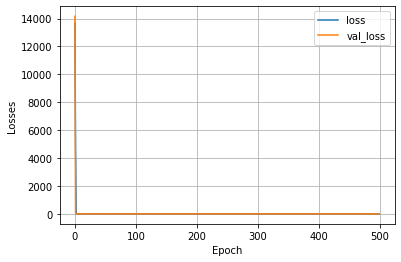

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
##plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend()
plt.grid(True)

In [22]:
predictions = model.predict(X_test)


In [23]:
from sklearn.metrics import r2_score

print(r2_score(y_test,predictions))

0.9982083737729497
